# Argo profiles in ECCO4

In this notebook we first download and plot data from one Argo float selected by its so-called `wmo` number. Then we compare it with climatological profiles, from OCCA, and compute a cost function. Climatological profiles can be replaced with profiles interpolated from an ECCO solution. This is typically how we measure and minimize model-data misfits in ECCO. Give it a try!

## notes

- The standard Argo platform is a profiling float that drifts at 1000m depth. They come back to the surface every ten days, just after collecting vertocal profiles of temperature and salinity, and transmit their data via satellite. 
- For more information about the international Argo program please refer to, for example, <https://argo.ucsd.edu> or <https://biogeochemical-argo.org>.

<img src="https://www.researchgate.net/profile/Taiyo-Kobayashi/publication/236890114/figure/fig1/AS:299396928425984@1448393198754/Distribution-of-profiling-floats-under-Argo-by-country-Total-number-of-floats-is-3256-as.png" width=240 height=240 /> | <img src="https://www.researchgate.net/profile/Taiyo-Kobayashi/publication/236890114/figure/fig2/AS:299396928425984@1448393198754/Distribution-of-profiling-floats-under-Argo-by-country-Total-number-of-floats-is-3256-as.png" width=180 height=180 /> | <img src="https://floats.pmel.noaa.gov/sites/default/files/photos/Deep%20Argo/15.%20Deep%20SOLO%20float%20starts%20its%20mission%20by%20sinking%20after%20deployment%20during%20HOT%20Cruise%20302.jpg" width=200 height=200 />


In [1]:
using ArgoData, Climatology, CairoMakie
using NCDatasets, Statistics

## Download and Visualize data

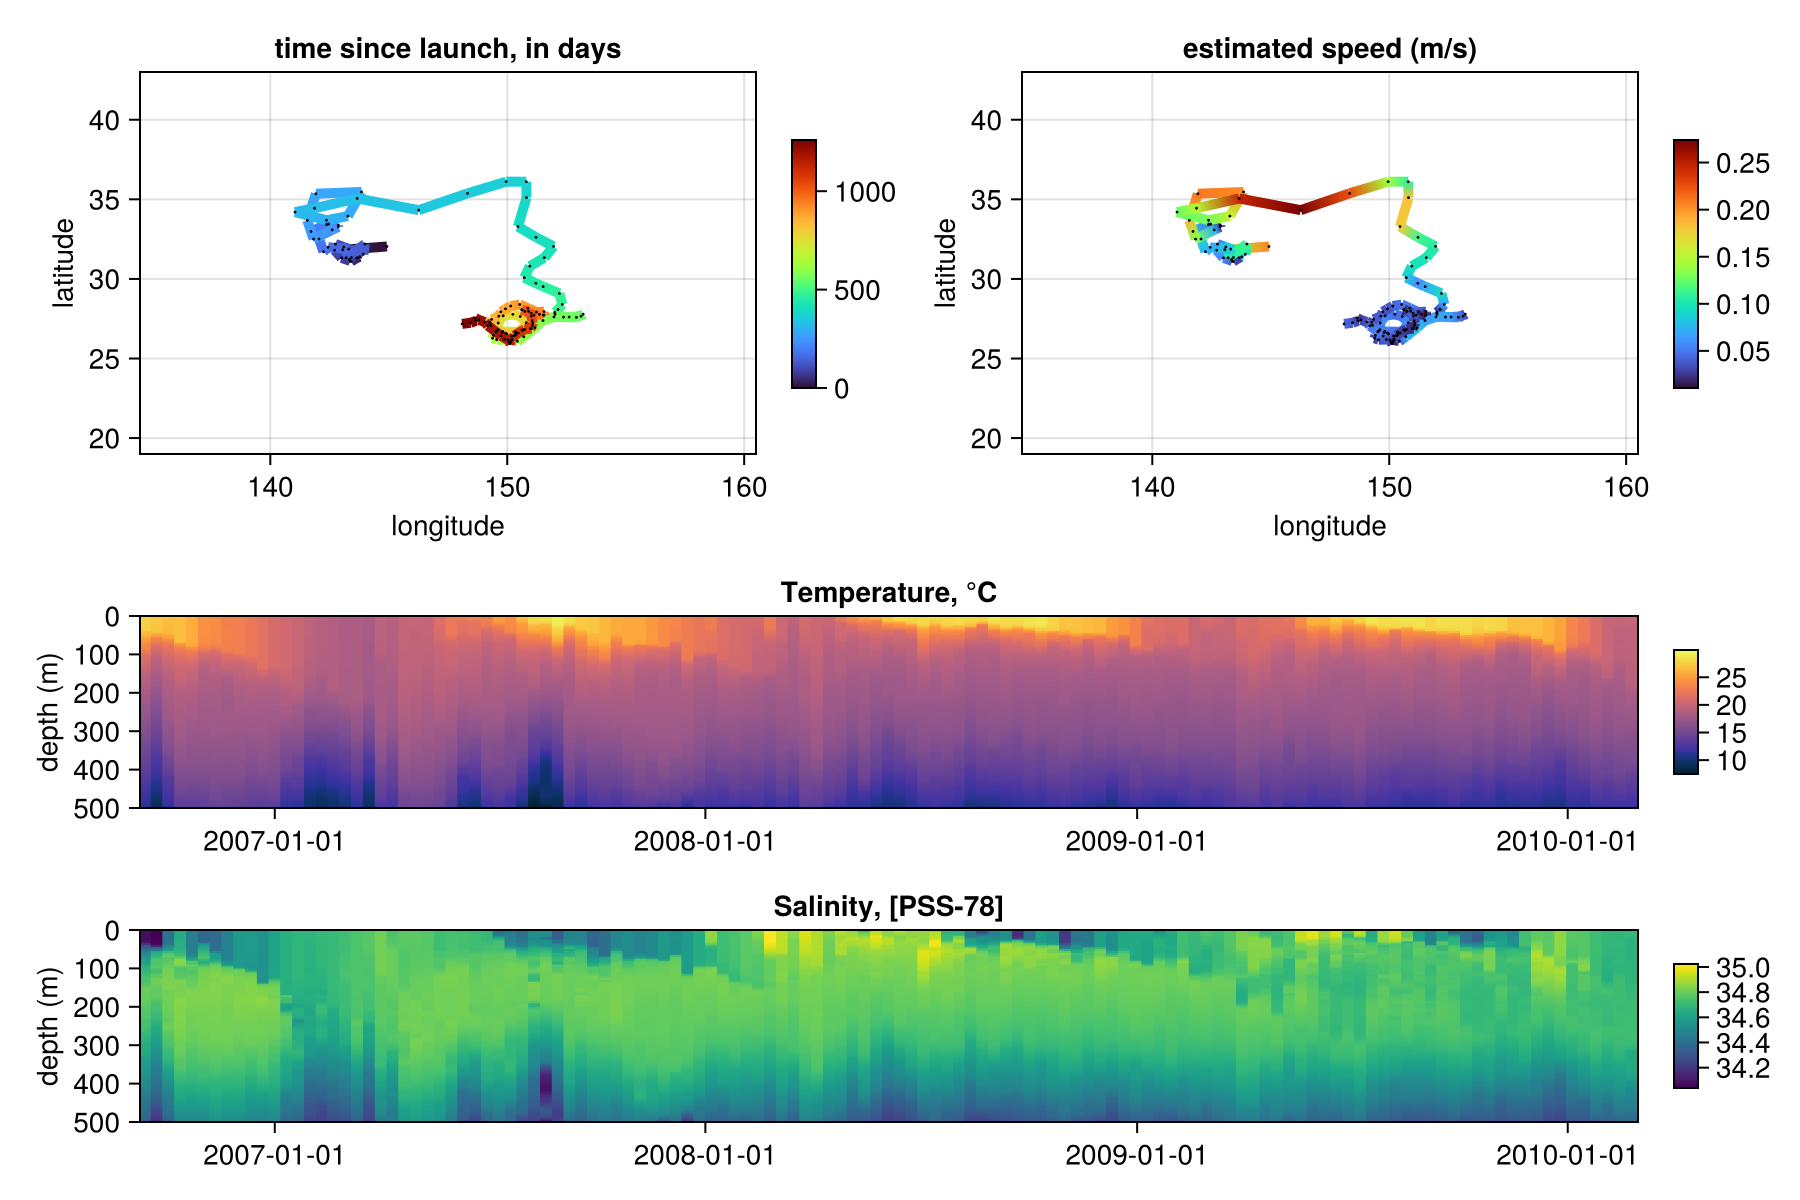

In [2]:
wmo=2900668
argo=read(OneArgoFloat(),wmo=wmo)
plot(argo)

## Cost Function Calculation

In [3]:
gridded_fields=GriddedFields.load()
files_list=GDAC.files_list();

In [4]:
input_file=ArgoFiles.download(files_list,wmo)

tmp=joinpath(tempdir(),"$(wmo)_MITprof.nc")
isfile(tmp) ? mv(tmp,tempname()*".nc") : nothing

output_file=MITprof.format(gridded_fields,input_file)

"/var/folders/vn/3r695jqd3177cw09wdmf3z940000gn/T/2900668_MITprof.nc"

In [5]:
begin
	ds=Dataset(output_file)
	
	println("Cost function values for float $(wmo) :")
	
	costT=ds["prof_Tweight"].* ((ds["prof_T"]-ds["prof_Testim"]).^2);
	ii=findall( ((!ismissing).(costT)).+(ds["prof_Tweight"].>0).>1 );

	costS=ds["prof_Sweight"].* ((ds["prof_S"]-ds["prof_Sestim"]).^2)
	ii=findall( ((!ismissing).(costS)).+(ds["prof_Sweight"].>0).>1 );
	
	println("mean T cost = $(mean(costT[ii])) ")
	println("mean S cost = $(mean(costS[ii])) ")
end

Cost function values for float 2900668 :
mean T cost = 1.1576142846909772 
mean S cost = 1.4136802763288467 
